In [3]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import log_loss
import scipy as sp
import pickle
from IPython.display import HTML



%matplotlib inline

In [4]:
with ZipFile('../data/train.csv.zip', 'r') as myzip:
    with myzip.open(myzip.filelist.pop()) as myfile:
        df = pd.read_csv(myfile)
        
        
with ZipFile('../data/test.csv.zip', 'r') as myzip:
    with myzip.open(myzip.filelist.pop()) as myfile:
        test_df = pd.read_csv(myfile)

In [224]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


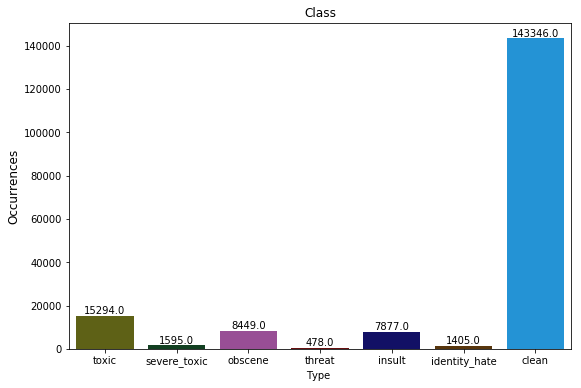

In [18]:
rowsums = df.iloc[:, 2:].sum(axis=1)
df['clean'] = (rowsums==0)

colors_list = ["brownish green", "pine green", "ugly purple",
               "blood", "deep blue", "brown", "azure"]

palette = sns.xkcd_palette(colors_list)

x = df.iloc[:, 2:].sum()

plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')


# plt.savefig('figures/labels.pdf')

In [23]:
WordCloud?

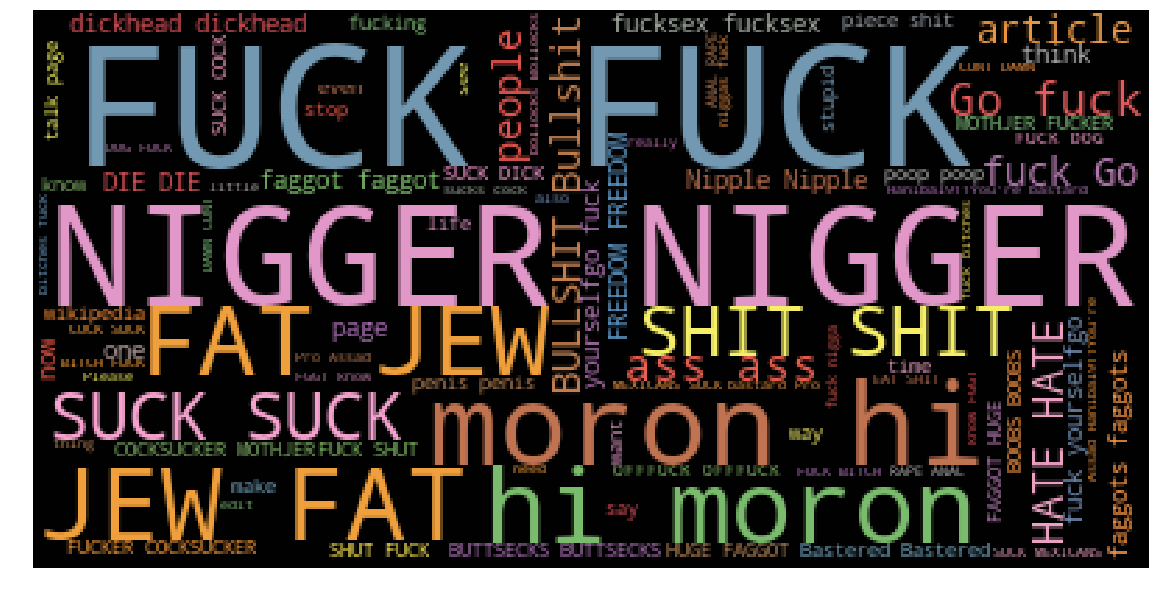

In [30]:
plt.figure(figsize=(20, 15))

toxic = df.comment_text[df.iloc[:, 2:].apply(lambda x: sum(x) > 1, axis=1)].values

wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 60)

wc.generate(" ".join(toxic))
# plt.title("Toxic Comments WordCloud", fontsize=10)
plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.7)
plt.axis('off')
plt.savefig('figures/wordcloud.pdf')

(-0.5, 399.5, 199.5, -0.5)

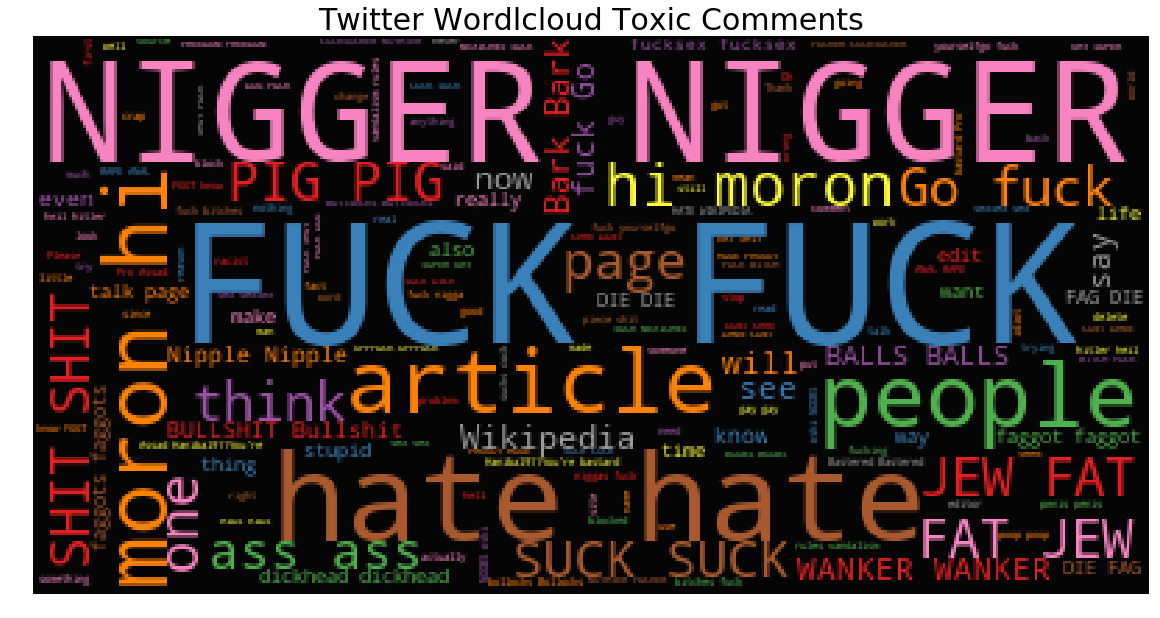

In [21]:
plt.figure(figsize=(20, 20))

toxic = df.comment_text[df.toxic identity_hate == 1].values

wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 60)

wc.generate(" ".join(toxic))
plt.title("Wordlcloud Toxic Comments", fontsize=30)
# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')
# plt.savefig('figures/wordcloud.pdf')

# Tf-dif bench mark

In [37]:
?train_test_split

In [31]:
vect_word = TfidfVectorizer(max_features=10000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)

train_vect = vect_word.fit_transform(df['comment_text'])


labels = df.iloc[:, 2:]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train_vect, labels,
                                                    test_size=0.3,
                                                    random_state=11)

In [47]:
target_col = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']

pred = np.zeros((X_test.shape[0],y_train.shape[1]))
cv_score = []
for i,col in enumerate(target_col):
    lr = LogisticRegression(C=4,random_state = i)
    print('Building {} model for column:{''}'.format(i,col)) 
    lr.fit(X_train,y_train[col])
    #cv_score.append(lr.score)
    pred[:,i] = lr.predict_proba(X_test)[:,1]

Building 0 model for column:toxic
Building 1 model for column:severe_toxic
Building 2 model for column:obscene
Building 3 model for column:threat
Building 4 model for column:insult
Building 5 model for column:identity_hate


In [71]:
loss = 0 
for i in range(pred.shape[1]):
    loss += log_loss(y_test.iloc[:, i].values, pred[:, i])
    
print('Benchmark logloss: {}'.format(loss/pred.shape[1]))

Benchmark logloss: 0.055673803634180924


In [131]:
a = """
<div id="text"> text goes here</div>

<script type="text/Javascript">

    var words = 
"""

b = """[{'""attention': 0.061400001, 'word': 'include'}, {'attention': 0.174499999, 'word': 'busting'}, {'attention': 0.421299999, 'word': 'ass'}, {'attention': 0.0211, 'word': 'bad'}, {'attention': 0.022600001, 'word': 'anywhere'}, {'attention': 0.021, 'word': 'always'}, {'attention': 0.0222, 'word': 'explanation'}, {'attention': 0.0208, 'word': 'use_rationale'}, {'attention': 0.0221, 'word': 'eighty'}, {'attention': 0.022399999, 'word': 'pointed'}, {'attention': 0.0231, 'word': 'information'}, {'attention': 0.025800001, 'word': 'backlog'}, {'attention': 0.0, 'word': 'closure'}, {'attention': 0.022600001, 'word': 'looked'}, {'attention': 0.0222, 'word': 'number'}, {'attention': 0.112299999, 'word': 'go'}, {'attention': 0.4211, 'word': 'pussy'}, {'attention': 0.0244, 'word': 'expertise'}, {'attention': 0.0221, 'word': 'complies'}, {'attention': 0.022600001, 'word': 'branding'}, {'attention': 0.022, 'word': 'swatjester_son'}, {'attention': 0.021500001, 'word': 'explanation_rationale'}, {'attention': 0.0221, 'word': 'new_york'}, {'attention': 0.023600001, 'word': 'intention'}, {'attention': 0.022600001, 'word': 'following'}, {'attention': 0.4233, 'word': 'cock_cocksucker'}, {'attention': 0.1221, 'word': 'rebellion'}, {'attention': 0.022, 'word': 'think'}, {'attention': 0.02, 'word': 'include_fair'}, {'attention': 0.1021, 'word': 'guy'}, {'attention': 0.16, 'word': 'bogus'}, {'attention': 0.0218, 'word': 'phrase'}, {'attention': 0.022, 'word': 'talk'}, {'attention': 0.167, 'word': 'accident'}, {'attention': 0.0188, 'word': 'username'}, {'attention': 0.122, 'word': 'fruit'}, {'attention': 0.022, 'word': 'subpages'}, {'attention': 0.020400001, 'word': 'copyright_status'}, {'attention': 0.021400001, 'word': 'shem'}, {'attention': 0.022, 'word': 'subscription'}, {'attention': 0.0217, 'word': 'iqbal'}, {'attention': 0.11, 'word': 'descend'}, {'attention': 0.022, 'word': 'look_like'}, {'attention': 0.019200001, 'word': 'since'}, {'attention': 0.0218, 'word': 'blonde'}]"""


c = """;
$('#text').html($.map(words, function(w) {
  return '<span style="background-color:hsl(360,100%,' + (-w.attention * 50 + 100) + '%)">' + w.word + ' </span>'
}))
</script>
"""



HTML(a + b + c)

In [ ]:
a = """
<div id="text"> text goes here</div>

<script type="text/Javascript">

    var words = 
"""

b = str(visualize_sentence(data[21], index_to_word))

c = """;
$('#text').html($.map(words, function(w) {
  return '<span style="background-color:hsl(360,100%,' + (-w.attention * 50 + 100) + '%)">' + w.word + ' </span>'
}))
</script>
"""



HTML(a + b + c)

In [5]:
with open('../data/attention_viz.pickle', 'rb') as f:
    data = pickle.load(f)

In [6]:
with open('../data/processed/vocab.txt') as f:
    vocab = f.read().split('\n')

In [32]:
from gensim.corpora import Dictionary
word_dict= Dictionary.load_from_text('../data/processed/vocab.txt')
index_to_word = word_dict

In [70]:
def visualize_sentence(sentence, word_dict):
    words = []
    
    at=[]
    for idx, attn in sentence.items():
        word = word_dict[int(idx)]
        words.append({'word': word, 'attention':np.round(attn, 4)})
        at.append(attn)
        
    a = """<div id="text">Example:</div>

        <script type="text/Javascript">

            var words = 
        """

    b = str(words)

    c = """
        ;
        $('#text').html($.map(words, function(w) {
          return '<span style="background-color:hsl(360,100%,' + (-w.attention * 50 + 100) + '%)">' + w.word + ' </span>'
        }))
        </script>
        """


    return b

In [116]:
a = """
<div id="text"> text goes here</div>

<script type="text/Javascript">

    var words = 
"""

b = str(visualize_sentence(data[14], index_to_word))

c = """;
$('#text').html($.map(words, function(w) {
  return '<span style="background-color:hsl(360,100%,' + (-w.attention * 50 + 100) + '%)">' + w.word + ' </span>'
}))
</script>
"""


HTML(a + b + c)
b

"[{'attention': 0.021400001, 'word': 'include'}, {'attention': 0.024499999, 'word': 'busting'}, {'attention': 0.021299999, 'word': 'ass_mass'}, {'attention': 0.0211, 'word': 'bad'}, {'attention': 0.022600001, 'word': 'anywhere'}, {'attention': 0.021, 'word': 'always'}, {'attention': 0.0222, 'word': 'explanation'}, {'attention': 0.0208, 'word': 'use_rationale'}, {'attention': 0.0221, 'word': 'eighty'}, {'attention': 0.022399999, 'word': 'pointed'}, {'attention': 0.0231, 'word': 'information'}, {'attention': 0.025800001, 'word': 'backlog'}, {'attention': 0.0, 'word': 'closure'}, {'attention': 0.022600001, 'word': 'looked'}, {'attention': 0.0222, 'word': 'number'}, {'attention': 0.022299999, 'word': 'go'}, {'attention': 0.0211, 'word': 'pussy'}, {'attention': 0.0244, 'word': 'expertise'}, {'attention': 0.0221, 'word': 'complies'}, {'attention': 0.022600001, 'word': 'branding'}, {'attention': 0.022, 'word': 'swatjester_son'}, {'attention': 0.021500001, 'word': 'explanation_rationale'}, {'a

In [115]:
for d in data:
    print(' '.join([index_to_word[int(key)] for key in d.keys()]) + "\n")

song stink extremely hardcore omg subsection closure doll

yuck different misread wondered space_elevator suggestion_improvement clean listed seemingly explanation condescending demanded goat image_copyright tagged_described backlog closure tag_full born fix_problem personality link_located exact input stand cock_cocksucker box liberal reflect decade geometry downloads fundamental requesting exactly fall doll introductory_paragraph chew seems guess adam_smith haplogroups guy

achieve mission timely_manner blueprint specific template closure doll

new_york closure image competitive_tit rat make licensing_tag think whose transport thats someone trying fac

engage merge username edits_made hero closure background copyright help mean faggot stub

please owner_copyright one work could stuck symmetrical nomination closure

yes jpg_noticed edits_made reese video_tag film actually exceed closure stifling fascism year quickly ho_ho vital cunt mussolini difference killed barnett since illiterate

# new preprocessing

In [13]:
import spacy 
import itertools 
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import LineSentence
from gensim.corpora import Dictionary
import re 
import random
import tqdm
from textacy import preprocess
import multiprocessing


from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer



nlp = spacy.load('en')

In [67]:
def substitute_repeats_fixed_len(text, nchars, ntimes=3):
    return re.sub(r"(\S{{{}}})(\1{{{},}})".format(nchars, ntimes-1), r"\1", text)

def substitute_repeats(text, ntimes=3):
    for nchars in range(1, 20):
        text = substitute_repeats_fixed_len(text, nchars, ntimes)
    return text



# def punct_space(token):
#     return token.is_punct or token.is_space or \
#            token.like_num or token.is_stop or token.like_url or \
#            token.like_email or not token.is_alpha



def punct_space(token):
    return token.is_punct or token.is_space

def split_text_and_digits(text, regexps=None):
    if not regexps:
        regexps = [re.compile("([a-zA-Z]+)([0-9]+)"),
                   re.compile("([0-9]+)([a-zA-Z]+)")]
    for regexp in regexps:
        result = regexp.match(text)
        if result is not None:
            return ' '.join(result.groups())
    return text


replace_numbers = re.compile(r'\d+',re.IGNORECASE)
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
tokenize = RegexpTokenizer(r'\w+')
alpha_numeric = re.compile('[\W_]+')

with open('../data/bad_words_en.txt', 'r') as f:
    bad_words = f.read().split('\n')[:-1]
    

In [5]:
def tokenizer(df):
    
    for comment in nlp.pipe(df.comment_text.fillna('NA'), batch_size=10000, n_threads=-1):
        print(dir(comment))
        txt = preprocess.preprocess_text(comment, fix_unicode=True, lowercase=True, 
                           transliterate=True, no_urls=True, no_emails=True,
                           no_phone_numbers=True, no_numbers=True,
                           no_currency_symbols=True, no_punct=True,
                           no_contractions=True, no_accents=True)
        
        
        txt = [token.lemma_ for token in txt if not punct_space(token)]
        txt = [split_text_and_digits(token, ) for token in txt]
        txt = [substitute_repeats(token, 3) for token in txt]
        yield u' '.join(txt)

In [182]:
def is_bad(token):
    token = token.lower()
    bads = set()
    for word in bad_words:
        if word in token:
            if word == token:
                bads.add(token)
            else:
                bads.add(token)
                bads.add(word)
    
    if bads:
        return ' '.join(bads)
    else:
        return token

def parallelize_dataframe(df, func):
    num_cores = multiprocessing.cpu_count()-1  #leave one free to not freeze machine
    num_partitions = num_cores #number of partitions to split dataframe
    df_split = np.array_split(df, num_partitions)
    pool = multiprocessing.Pool(4)
    df = np.concatenate(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df


def my_preprocess(sentence, stopword=0, stem=0, lemma=1):
    
    sentence = alpha_numeric.sub(' ', sentence)
    sentence = replace_numbers.sub(' number ', sentence)
    sentence = tokenize.tokenize(sentence)
    sentence = [split_text_and_digits(token) for token in sentence]
    sentence = [substitute_repeats(token, 3) for token in sentence]
    sentence = [is_bad(token) for token in sentence]


    
    sentence = [word for word in sentence if len(word) > 1]
    if stopword:
        sentence = [word for word in sentence if not word in stopwords.words('english')]
    if stem:
        sentence = [porter_stemmer.stem(word) for word in sentence]
    if lemma: 
        sentence = [wordnet_lemmatizer.lemmatize(word) for word in sentence]

    return ' '.join(sentence)

def tokenizer(sentences):
    y = []
    if type(sentences) == str:
        sentences = [sentences]
    for comment in sentences:
        comment = my_preprocess(comment)
        txt = preprocess.normalize_whitespace(comment)
        
        txt = preprocess.preprocess_text(txt, 
                                         fix_unicode=True, 
                                         lowercase=True, 
                                         transliterate=True, 
                                         no_urls=True, 
                                         no_emails=True,
                                         no_phone_numbers=True,
                                         no_numbers=True,
                                         no_currency_symbols=True, 
                                         no_punct=True,
                                         no_contractions=True,
                                         no_accents=True)

    
        y.append(u''.join(txt))
    return y

In [122]:
sentence = df.comment_text[0]

stopword = 0
stem = 0
lemma = 1

sentence = alpha_numeric.sub(' ', sentence)
sentence = replace_numbers.sub(' number ', sentence)
sentence = tokenize.tokenize(sentence)
sentence = [split_text_and_digits(token) for token in sentence]
sentence = [substitute_repeats(token, 3) for token in sentence]



sentence = [word for word in sentence if len(word) > 1]
if stopword:
    sentence = [word for word in sentence if not word in stopwords.words('english')]
if stem:
    sentence = [porter_stemmer.stem(word) for word in sentence]
if lemma: 
    sentence = [wordnet_lemmatizer.lemmatize(word) for word in sentence]

    
' '.join(sentence)
# sentence

'Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren vandalism just closure on some GAs after voted at New York Dolls FAC And please don remove the template from the talk page since retired now number number number number'

In [181]:
type('sdsdf') == str

True

In [186]:
sentence = 'hello fuckshitass 234234fuck324234'


tokenizer(sentence)[0].split()

['hello', 'fuck', 'shit', 'fuckshitass', 'ass', 'number', 'fuck', 'number']

In [138]:
with open('../data/processed/normalized_comments.txt', 'w', encoding='utf_8') as f:
    text = np.concatenate([df.comment_text.values[:100], test_df.comment_text.values[:100]])
    processed_text = parallelize_dataframe(text, tokenizer)
    for line in processed_text:
        f.write(line + '\n')

In [139]:
lines = LineSentence('../data/processed/normalized_comments.txt')
bigram = Phrases(lines)
bigram.save('../data/processed/bigram')

In [140]:
phraser = Phraser(bigram)

In [141]:
with open('../data/processed/bigram_commnets.txt', 'w', encoding='utf_8') as f: 
    for comment in lines:
        comm = u' '.join(phraser[comment])
        f.write(comm + '\n')

In [142]:
commnets = LineSentence('../data/processed/bigram_commnets.txt')

In [143]:
bigram_dict = Dictionary(commnets, )

In [144]:
bigram_dict.filter_extremes(no_below=5, no_above=0.8)

In [145]:
bigram_dict.save_as_text('../data/processed/vocab.txt')

In [146]:
bigram_dict.doc2idx(['ass', 'fuck'])

[189, 276]

In [156]:
bigram_dict.add_documents([['<pad>'],['<ass>']])

In [160]:
bigram_dict.doc2idx(['<pad>', 'ass', 'shsklkjdgksdj'])

[317, 189, -1]

In [1]:
import tensorflow as tf 

In [3]:
import tensorflow as tf

a = tf.Variable([0.1, 0.5], [0.1, 0.5])
b = tf.Variable([0.2, 0.6], [0.1, 0.5])

a = tf.Variable([0.1, 0.5])
b = tf.Variable([0.2, 0.6])

auc = tf.contrib.metrics.streaming_auc(a, b)
# auc = tf.metrics.auc(a, b)

sess = tf.Session()
sess.run(tf.initialize_all_variables())
sess.run(tf.initialize_local_variables()) # try commenting this line and you'll get the error
train_auc = sess.run(auc)

print(train_auc)

Instructions for updating:
Use `tf.local_variables_initializer` instead.


InvalidArgumentError: assertion failed: [predictions must be in [0, 1]] [Condition x <= y did not hold element-wise:x (Variable_2/read:0) = ] [0 0] [y (auc_1/Cast_1/x:0) = ] [1]
	 [[Node: auc_1/assert_less_equal/Assert/AssertGuard/Assert = Assert[T=[DT_STRING, DT_STRING, DT_FLOAT, DT_STRING, DT_FLOAT], summarize=3, _device="/job:localhost/replica:0/task:0/device:CPU:0"](auc_1/assert_less_equal/Assert/AssertGuard/Assert/Switch/_27, auc_1/assert_less_equal/Assert/AssertGuard/Assert/data_0, auc_1/assert_less_equal/Assert/AssertGuard/Assert/data_1, auc_1/assert_less_equal/Assert/AssertGuard/Assert/Switch_1/_29, auc_1/assert_less_equal/Assert/AssertGuard/Assert/data_3, auc_1/assert_less_equal/Assert/AssertGuard/Assert/Switch_2/_31)]]

Caused by op 'auc_1/assert_less_equal/Assert/AssertGuard/Assert', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-7dd09da37d38>", line 9, in <module>
    auc = tf.contrib.metrics.streaming_auc(a, b)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/contrib/metrics/python/ops/metric_ops.py", line 895, in streaming_auc
    curve=curve, updates_collections=updates_collections, name=name)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/ops/metrics_impl.py", line 641, in auc
    labels, predictions, thresholds, weights)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/ops/metrics_impl.py", line 473, in _confusion_matrix_at_thresholds
    message='predictions must be in [0, 1]')
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/ops/check_ops.py", line 443, in assert_less_equal
    return control_flow_ops.Assert(condition, data, summarize=summarize)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/util/tf_should_use.py", line 107, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 134, in Assert
    condition, no_op, true_assert, name="AssertGuard")
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 316, in new_func
    return func(*args, **kwargs)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 1864, in cond
    orig_res_f, res_f = context_f.BuildCondBranch(false_fn)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 1725, in BuildCondBranch
    original_result = fn()
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 132, in true_assert
    condition, data, summarize, name="Assert")
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/ops/gen_logging_ops.py", line 47, in _assert
    name=name)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/mfc/.virtualenvs/toxic_comment/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): assertion failed: [predictions must be in [0, 1]] [Condition x <= y did not hold element-wise:x (Variable_2/read:0) = ] [0 0] [y (auc_1/Cast_1/x:0) = ] [1]
	 [[Node: auc_1/assert_less_equal/Assert/AssertGuard/Assert = Assert[T=[DT_STRING, DT_STRING, DT_FLOAT, DT_STRING, DT_FLOAT], summarize=3, _device="/job:localhost/replica:0/task:0/device:CPU:0"](auc_1/assert_less_equal/Assert/AssertGuard/Assert/Switch/_27, auc_1/assert_less_equal/Assert/AssertGuard/Assert/data_0, auc_1/assert_less_equal/Assert/AssertGuard/Assert/data_1, auc_1/assert_less_equal/Assert/AssertGuard/Assert/Switch_1/_29, auc_1/assert_less_equal/Assert/AssertGuard/Assert/data_3, auc_1/assert_less_equal/Assert/AssertGuard/Assert/Switch_2/_31)]]


In [22]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]],
                 [[3, 3, 3], [4, 4, 4]],
                 [[5, 5, 5], [6, 6, 6]]])

In [105]:
from sklearn.metrics import roc_auc_score
a = tf.random_uniform(shape = (100, 6), minval=0, maxval=1)
b = tf.random_uniform(shape = (100, 6), minval=0, maxval=1)


c = a[:, 0]
d = a[:, 0]
g = roc_auc_score(c, d)



sess.run(tf.initialize_all_variables())
sess.run(tf.initialize_local_variables()) 

r=sess.run(g)


ValueError: Expected array-like (array or non-string sequence), got <tf.Tensor 'strided_slice_58:0' shape=(100,) dtype=float32>

In [116]:
a = tf.random_uniform(shape = (5, 2), minval=-1, maxval=0)
b = tf.random_uniform(shape = (5, 2), minval=0, maxval=1)
c = tf.stack([a, b], axis =0)





sess.run(tf.initialize_all_variables())
sess.run(tf.initialize_local_variables()) 

d = sess.run(c)

d[:, 0, :]

array([[-0.39804339, -0.42949593],
       [ 0.07410085,  0.09175301]], dtype=float32)

In [115]:
a = tf.abs(tf.random_normal(shape = (1, 5, 6), mean=0,stddev=0.01))
b = tf.abs(tf.random_uniform(shape = (1, 5, 6), minval=-1, maxval=1, 
                      dtype=tf.float32))

a = tf.abs(tf.random_uniform(shape = (1, 5, 6), minval=-1, maxval=1, 
                             dtype=tf.float32))
# b = tf.random_normal(shape = (10, 6), mean=0,stddev=0.01)

def column_loss(pred, label, func):
    L = tf.split(label, [1,1,1,1,1,1], 2)
    P = tf.split(pred, [1,1,1,1,1,1], 2)
  
    loss = []
    for i in range(6):
        auc = func(labels=tf.squeeze(L[i]),
                   predictions=tf.squeeze(P[i]),)
#                    reduction=tf.losses.Reduction.SUM)
        loss.append(auc)
        
    return tf.reduce_mean(loss)

e = column_loss(a, b, tf.losses.log_loss)
# e = column_loss(a, b, tf.metrics.auc)

# f = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = a, labels=b), axis=0)
# g = tf.nn.sigmoid_cross_entropy_with_logits(logits = a, labels=b)
sess = tf.Session()
sess.run(tf.initialize_all_variables())
sess.run(tf.initialize_local_variables()) 

d = sess.run([e])
d

[1.0802344]

In [110]:
a = tf.abs(tf.random_normal(shape = (1, 5, 6), mean=0,stddev=0.01))

L = tf.split(a, [1,1,1,1,1,1], 2)


sess = tf.Session()
sess.run(tf.initialize_all_variables())
sess.run(tf.initialize_local_variables()) 

sess.run(L)

[array([[[ 0.00940282],
         [ 0.00821005],
         [ 0.00158813],
         [ 0.00500124],
         [ 0.00179979]]], dtype=float32), array([[[ 0.00060563],
         [ 0.00677057],
         [ 0.0076752 ],
         [ 0.00435148],
         [ 0.0064183 ]]], dtype=float32), array([[[ 0.00552502],
         [ 0.00656977],
         [ 0.00399949],
         [ 0.01374912],
         [ 0.00369865]]], dtype=float32), array([[[ 0.01047943],
         [ 0.00991069],
         [ 0.00633271],
         [ 0.0008238 ],
         [ 0.01336293]]], dtype=float32), array([[[ 0.00733135],
         [ 0.01726235],
         [ 0.00566774],
         [ 0.00015027],
         [ 0.00387888]]], dtype=float32), array([[[ 0.00855322],
         [ 0.02049592],
         [ 0.00759362],
         [ 0.00290766],
         [ 0.01144967]]], dtype=float32)]

In [105]:
import numpy as np
np.mean(d[1])

0.70790225